In [20]:
import numpy as np
from lpfgopt.leapfrog import LeapFrog
import matplotlib.pyplot as plt
%matplotlib inline


In [21]:
def run(f, bounds, check, options={}, output=False, tol=1e-3):
    '''
    Runs a benchmark test with the given parameters and causes a
    failing result for nosetests on a failure.
    '''
    lf = LeapFrog(f, bounds, **options)
#     print(lf)
#     for i  in range(100):
#         lf.iterate()
#         print(lf)
#         input("> ")
    
    sol = lf.minimize()
    
    r = "Correct opt"
    print(f"{r:12} : {check}\n")
    
    for key, value in sol.items():
        if key == "pointset": continue
        print(f"{key:12} : {value}")

    for i in sol['pointset']:
        print(i)

    assert sol['success'], "Optimization Failed"
    
    for i in range(len(check)):
        if abs(check[i]) < tol:
            norm = 1.0
        else:
            norm = check[i]
        err = abs((check[i] - sol['x'][i])/norm)
        assert err <= tol, f"Failed on parameter index {i} with error {err}"
    
    if output:
        raise Exception("Generic Exception")

def g(x):
        conval = 0
        cons = [
            (x[0] - 1)**3 - x[1] + 1,
            x[0] + x[1] - 2         ]
        for con in cons:
            if con > 0:
                conval += con
        return conval *100
        
def rosenbrock_line_cubic_test():
    """
    Rosenbrock function constrained with a cubic and a line benchmark
    """        
    options = {
        "tol"         : 1e-3,
        "seedval"     : 4815162342,
        "fconstraint" : g
        }
        
    f = lambda x: (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2
    
    bounds = [
        [-1.5, 1.5],
        [-0.5, 2.5]]
#    bounds = [
#         [-3.0, 3.0],
#         [-3.0, 3.0]]
    check = [1.0, 1.0]
    
    run(f, bounds, check, options, tol=1.5e-3)


In [43]:
def g(x):
        conval = 0
        cons = [
            (x[0] - 1)**3 - x[1] + 1,
            x[0] + x[1] - 2         ]
        for con in cons:
            if con > 0:
                conval += con
        return conval *100
f = lambda x: (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2
print(g([0.00001,0.0]))
print(f([0.00001,-0.00001]))

0.0029999700000837848
0.9999800101002001


In [23]:
#rosenbrock_line_cubic_test()

0.13097774999999956
9.886177420995063


(-5, 5)

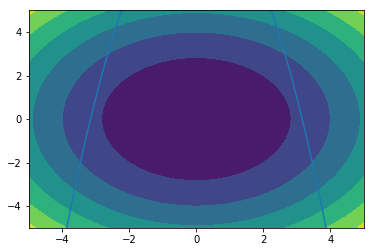

In [85]:
g = lambda x: -x[0]**2 + 10 - x[1] 
gg = lambda x: -x**2 + 10
f = lambda x: sum([i**2 for i in x])
x, y = np.linspace(-5,5,1000), np.linspace(-5,5,1000)
X, Y = np.meshgrid(x,y)
Z = f([X,Y])
ans = [-3.1415, 0.130395598910642]
adjust = 0.0
print(gg(ans[0] + adjust))
print(f([ans[0] + adjust, gg(ans[0] + adjust)]))
# 9.886607413304622
plt.contourf(X,Y,Z)
plt.plot(x, gg(x))
plt.ylim(-5,5)
plt.xlim(-5,5)

(-1.5, 1.5)

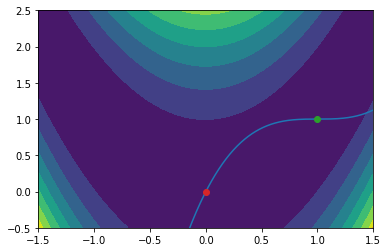

In [38]:
g = lambda x: -x[0]**2 + 10 - x[1] 
gg = lambda x: (x - 1)**3 + 1
g2 = lambda x: x - 2 
f = lambda x: (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2
lowerx, upperx = [-1.5, 1.5]
lowery, uppery = [-0.5, 2.5]
x, y = np.linspace(lowerx, upperx,1000), np.linspace(lowery, uppery,1000)
X, Y = np.meshgrid(x,y)
Z = f([X,Y])

plt.contourf(X,Y,Z)
plt.plot(x, gg(x))
plt.plot(x, g2(x))
plt.plot([1],[1], 'o')
plt.plot([0],[0], 'o')
plt.ylim(lowery, uppery)
plt.xlim(lowerx, upperx)